In [42]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [58]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_


ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cu111 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1)
ERROR: No matching distribution found for torch==1.8.1+cu111


In [2]:
!cd yolov5 & pip install -r requirements.txt

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [39]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\marco/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-2-22 Python-3.10.12 torch-2.2.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [6]:
img = 'https://www.mywheels.tv/var/mywheels/storage/images/auto/wie-entsteht-ein-stau/926201-4-ger-DE/wie-entsteht-ein-stau_i753.jpg'

In [7]:
results = model(img)
results.print()

image 1/1: 502x753 1 person, 15 cars, 2 motorcycles, 1 bus, 7 trucks
Speed: 1371.7ms pre-process, 236.3ms inference, 0.0ms NMS per image at shape (1, 3, 448, 640)


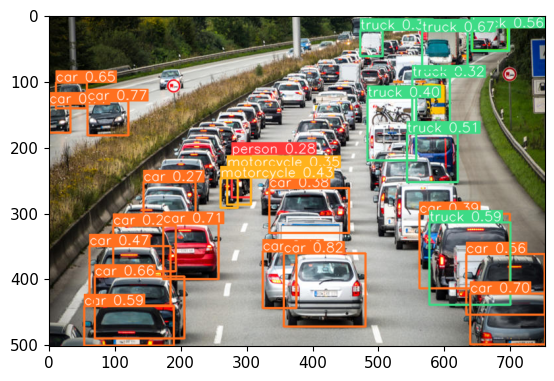

In [8]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [9]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

In [9]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [17]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [20]:
import ssl
import urllib
import os
import time
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
!cd yolov5 && python train.py --img 640 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

In [56]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp16/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\marco/.cache\torch\hub\master.zip
YOLOv5  2024-2-25 Python-3.10.12 torch-2.2.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


image 1/1: 1729x2305 (no detections)
Speed: 35.6ms pre-process, 128.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


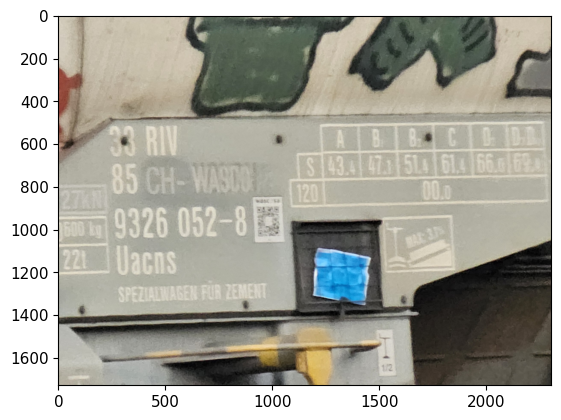

In [19]:
%matplotlib inline 
img = os.path.join('7.jpg')
results = model(img)
results.print()
plt.imshow(np.squeeze(results.render()))
plt.show()

image 1/1: 480x640 1 EVN_V
Speed: 25.9ms pre-process, 137.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


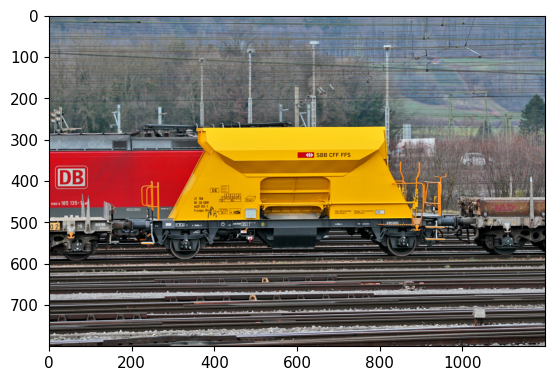

In [15]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()